In [151]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
%matplotlib inline

def run(hatchery, species, river):
    #Create df from hatchery file
    esc = pd.read_csv('wdfwHatchery6_18.csv', low_memory=False)
    esc = esc[['Species', 'Event','Origin','Brood Year','Run','Facility','Adult Count','Date']]
    esc = esc[esc.Event == 'Trap Estimate']
    esc = esc[esc.Origin == 'HATCHERY']
    esc = esc[esc['Adult Count'] != 0]
    esc['Date'] = pd.to_datetime(esc['Date'])
    esc = esc[esc.Facility == hatchery]
    esc = esc[esc.Species == species]
    esc = esc.sort_values('Date')

    #Creat df from rivers file
    df = pd.read_csv(river, sep='\t', header=None)
    df = df.rename(columns ={2:"Date",3:"cfs"})
    df = df.drop(columns=[0,1,4],)
    df['Date'] = df['Date'].astype('datetime64[ns]')
    df.head()

#     #Specify date range for each species
#     df_time = esc
#     first = df_time.iloc[0].Date
#     last = df_time.iloc[-1].Date

#     #Merge data frames and trim for species date range
    plt_tst = pd.merge(df, esc, on=['Date'], how='outer')
#     rt = (plt_tst['Date'] >= first) & (plt_tst['Date'] <= last)
#     plt_tst = plt_tst.loc[rt]
    plt_tst['Year'] = plt_tst['Date'].dt.strftime('%Y').astype(np.int64)
    plt_tst['DOY'] = plt_tst['Date'].dt.strftime('%j')
    plt_tst['Adult Count'] = plt_tst['Adult Count'].fillna(0).astype(np.int64)
    plt_tst['returnBinary'] = plt_tst['Adult Count'].astype(np.int64)
    plt_tst.loc[plt_tst.returnBinary > 0, 'returnBinary'] = 1
#     plt_tst = plt_tst[plt_tst.Year == year]
    
    #Define season for fish
    mask = plt_tst.returnBinary == 1
    season = plt_tst.loc[mask, 'DOY'].tolist()
    season = list(set(season))
    m = plt_tst['DOY'].isin(season)
    plt_tst = plt_tst[m]

    #Normalize data by year
    tf = plt_tst.groupby('Year').sum('Adult Count')
    sf = plt_tst.set_index('Year')
    sf = sf.merge(tf, on='Year')
    sf = sf[['Adult Count_x', 'cfs_x','Date','returnBinary_y', 'Adult Count_y','returnBinary_x','DOY']]
    sf = sf.rename(columns = {'Adult Count_x':'Count', 'cfs_x':'cfs','returnBinary_y':'#obsv','returnBinary_x':'returnBinary','Adult Count_y':'yearTotal'})
    sf['%total'] = sf.Count/sf.yearTotal
    sf = sf.set_index('Date')
    sf = sf[['%total','cfs','DOY']]
    
    #Merge Weather Df
    wdf = pd.read_csv('weatherMonroe.csv', low_memory=False)
    wdf = wdf.rename(columns={'DATE':'Date'})
    wdf['Date'] = wdf['Date'].astype('datetime64[ns]')
    mdf = pd.merge(sf, wdf, on=['Date'], how='outer')
    mdf['Year'] = mdf['Date'].dt.strftime('%Y').astype(np.int64)
    mdf = mdf.set_index('Date')
    mdf = mdf[['PRCP','TMAX','TMIN','%total','cfs','DOY','Year']]
    mdf = mdf.dropna()
    
    return(mdf)
   



In [152]:
river = 'sky.txt'
species = 'Coho'
hatchery = 'WALLACE R HATCHERY'


In [153]:
df = run(hatchery,species,river)


,PRCP,TMAX,TMIN,%total,cfs,DOY,Year
Date,,,,,,,
2019-01-09,0.44,45.0,37.0,0.000000,3560.0,009,2019
2019-01-10,0.25,48.0,41.0,0.000000,4730.0,010,2019
2019-01-16,0.00,54.0,27.0,0.000000,2330.0,016,2019
2019-02-28,0.01,47.0,24.0,0.000000,899.0,059,2019
2019-09-05,0.00,76.0,50.0,0.000000,429.0,248,2019
2019-09-06,0.00,80.0,55.0,0.000000,424.0,249,2019
2019-09-08,1.10,64.0,55.0,0.000000,442.0,251,2019
2019-09-09,1.68,63.0,56.0,0.000434,522.0,252,2019
2019-09-13,0.08,67.0,54.0,0.021683,566.0,256,2019


In [154]:
def pearsonR(sf): 
    #Calculate Pearson R
    pearson_r = sf.corr()
    r, p = stats.pearsonr(sf['%total'], sf['cfs'])
    print(f"Pandas computed Pearson r is:\n {pearson_r}")


In [155]:
def spearmanR(sf): 
    #Calculate Pearson R
    coef, p = spearmanr(sf['%total'],sf['cfs'])
    print(f"Coeficient: {coef} p-value: {p}")
                        

In [160]:
pearsonR(af)

Pandas computed Pearson r is:
             PRCP      TMAX      TMIN    %total       cfs  Year
PRCP    1.000000  0.277340  0.508052  0.341542  0.151044   NaN
TMAX    0.277340  1.000000  0.812311  0.359047 -0.067724   NaN
TMIN    0.508052  0.812311  1.000000  0.428554  0.046622   NaN
%total  0.341542  0.359047  0.428554  1.000000  0.128809   NaN
cfs     0.151044 -0.067724  0.046622  0.128809  1.000000   NaN
Year         NaN       NaN       NaN       NaN       NaN   NaN


In [180]:
spearmanR(df)

Coeficient: 0.18426006004049084 p-value: 9.622236768861617e-16


In [162]:
precipitation = 'PRCP'
cfs = 'cfs'
def rollingCorr(sf, window, weather):
    #Calculate Rolling Correlation
    f,ax = plt.subplots(figsize=(8, 4))
    rolling_r = sf[weather].rolling(window=window, center=True).corr(sf['%total']).plot(ax=ax)

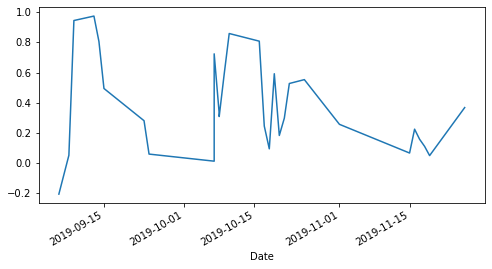

In [163]:
rollingCorr(af, 6, cfs)

In [113]:
def crossCorr(sf, weather):
    plt.xcorr(sf[weather], sf['%total'], usevlines=True, maxlags=28)
    plt.grid(True)
    plt.axhline(0.2, color='blue', linestyle='dashed', lw=2)
    plt.ylim([0, 0.7])
    plt.title("Cross-correlation")

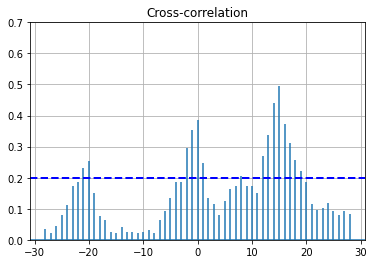

In [178]:
af = df[df.Year == 2015]
crossCorr(af, precipitation)

In [179]:
x = range(1997,2021)
y = list(x)
y

for l in y:
    v = df[df.Year == l]
    print(l)
    spearmanR(v)

1997
Coeficient: 0.07861903081112291 p-value: 0.6741963859327709
1998
Coeficient: 0.02003900696636238 p-value: 0.8407675001756483
1999
Coeficient: 0.10140778856450428 p-value: 0.30569131353160717
2000
Coeficient: 0.1971195017711807 p-value: 0.04385059069562377
2001
Coeficient: nan p-value: nan
2002
Coeficient: -0.03135377808006251 p-value: 0.7568104119267675
2003
Coeficient: 0.19110018359238967 p-value: 0.051986975412903556
2004
Coeficient: 0.16018023868762898 p-value: 0.10262282040836519
2005
Coeficient: 0.16677983168606497 p-value: 0.09061851259111792
2006
Coeficient: nan p-value: nan
2007
Coeficient: nan p-value: nan
2008
Coeficient: nan p-value: nan
2009
Coeficient: nan p-value: nan
2010
Coeficient: 0.13474735875746718 p-value: 0.172637146426149
2011
Coeficient: 0.28194008358561645 p-value: 0.0037369803174601996
2012
Coeficient: 0.3059273673120509 p-value: 0.0016743198251542464
2013
Coeficient: 0.06604975347056247 p-value: 0.5074104229020129
2014
Coeficient: 0.21613847357300378 p-v

C:\Users\austi\anaconda3\envs\project\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
